# Corso di Probabilità e Statistica - La distribuzione binomiale

In questo capitolo introduciamo la distribuzione binomiale


In [1]:
import scipy.stats as stats #modulo di statistica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Binomiale

### Generiamo un processo binomiale empiricamente

In [2]:
#parametri
n=10  #numero di tentativi
p=0.5 #probabilità di successo
NR=1000 #numero di realizzazioni del processo

In [3]:
bd = np.zeros(n+1) #inizializzazione

In [4]:
for i in range(NR): #loop sulle realizzazioni
    k=0 #k numero di successi
    for j in range(n): #loop su n
        x=np.random.rand() 
        if(x<p): #successo con probabilità p 
            k=k+1 
    bd[k]=bd[k]+1 

In [5]:
bd=bd/NR #normalizzazione

### Confrontiamo il risultato empirico con la distribuzione binomiale teorica

In [6]:
bd1 = stats.binom(n, p) #distribuzione binomiale

In [7]:
# confrontiamo i valori di B_p^n(k)
k=3
bd[k],bd1.pmf(k)

(0.125, 0.1171875)

In [8]:
# confrontiamo le media
mu1=bd1.mean()
mu=np.average(np.arange(n+1),weights=bd) #media pesata sulla distribuzione empirica 
mu,mu1

(5.034, 5.0)

In [9]:
# confrontiamo la varianza
sigma2_1=bd1.var()
sigma2=np.average(np.arange(n+1)**2,weights=bd)-mu**2
sigma2,sigma2_1

(2.4628440000000005, 2.5)

In [10]:
# calcoliamo i momenti
r=3
mom1=bd1.moment(r)
mom=np.average(np.arange(n+1)**r,weights=bd)
mom1,mom

(162.5, 165.0)

### Grafici

In [11]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

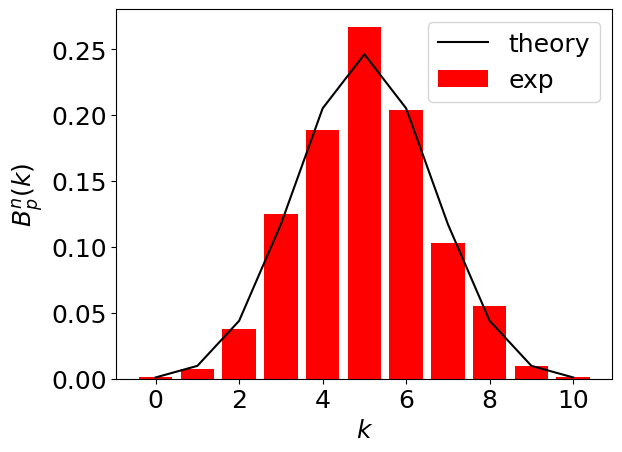

In [12]:
k = np.arange(n+1)
plt.plot(k, bd1.pmf(k), label="theory", color="black") #linee
plt.bar(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

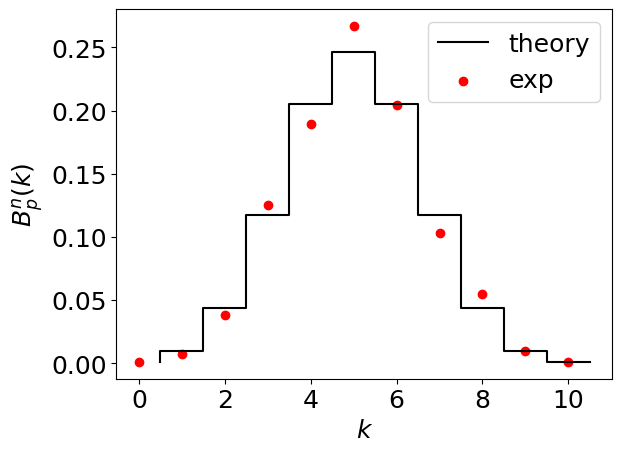

In [13]:
k = np.arange(n+1)
plt.step(k+.5, bd1.pmf(k), label="theory", color='black') #step
plt.scatter(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

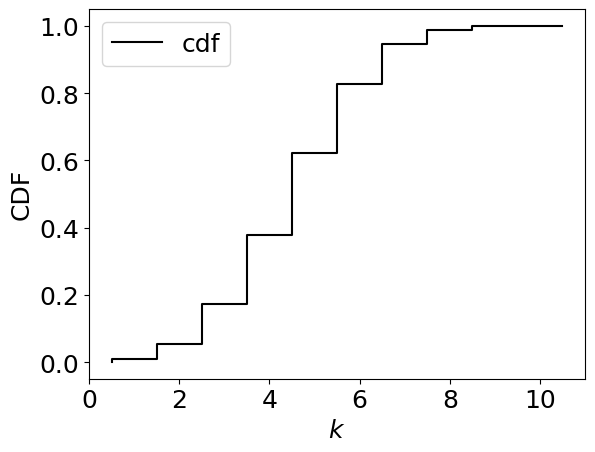

In [14]:
#distribuzione cumulata
plt.step(k+.5, bd1.cdf(k), label="cdf", color='black') #step
plt.xlabel(r'$k$') 
plt.ylabel('CDF') 
plt.legend()

## Esercizio: la distribuzione multinomiale

Ripetere lo stesso esempio per il caso della distribuzione multinomiale. 
- Utilizzare la funzione scipy.stats.multinomial(n,p) dove p questa volta è un vettore di k componenti che indica le probabilità dei vari casi
- Considerare per semplicità il caso k=3 per cui p=[p1,p2,1-p1-p2]
- Generare la distribuzione empririca  
- Confrontare la distribuzione empirica con quella teorica

Per maggiori informazioni sulla funzione:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html

**Nota**: Esempio di sintassi "if" in python:

if x < 0:

    a=0
    
elif x == 0:

    a=1
    
else:

    a=2

### Generiamo un processo multinomiale empiricamente

In [15]:
#parametri
n=10  #numero di tentativi
p=np.array((0.5, 0.2, 0.3)) #probabilità di successo
NR=100000 #numero di realizzazioni del processo
p

array([0.5, 0.2, 0.3])

In [16]:
bd = np.zeros((n+1, n+1)) #inizializzazione

In [17]:
for i in range(NR): #loop sulle realizzazioni
    k1=0 #k numero di successi evento 1
    k2=0 #k numero di successi evento 2
    for j in range(n): #loop su n
        x=np.random.rand() 
        if(x<=p[0]): #successo con probabilità p1 
            k1=k1+1
        elif((x>p[0]) & (x<=p[1]+p[0])): #successo con probabilità p2 
            k2=k2+1
      
    bd[k1,k2]=bd[k1,k2]+1 

In [18]:
#print(bd)
bd=bd/NR #normalizzazione

### Confrontiamo il risultato empirico con la distribuzione binomiale teorica

In [19]:
# Calcolo della distribuzione multinomiale teorica
bd_teorica = np.zeros((n+1, n+1))

for k1 in range(n+1):
    for k2 in range(n+1-k1):
        k3 = n - k1 - k2  # successi evento 3 (insuccessi)
        bd_teorica[k1, k2] = stats.multinomial.pmf([k1, k2, k3], n, p)

In [23]:
# Calcolo della media
# Creiamo una matrice di coordinate per k1 e k2 per avere dei pesi
k1_values = np.arange(n + 1)
k2_values = np.arange(n + 1)

# Calcolo della media per ogni evento
mean_k1 = np.sum(bd.sum(axis=1) * k1_values)  # Media per l'evento 1
mean_k2 = np.sum(bd.sum(axis=0) * k2_values)  # Media per l'evento 2

mean_teo1 = np.sum(bd_teorica.sum(axis=1) * k1_values)  # Media teorica per l'evento 1
mean_teo2 = np.sum(bd_teorica.sum(axis=0) * k2_values)  # Media teorica per l'evento 2

mean_k1, mean_k2, mean_teo1, mean_teo2

(5.00393, 2.0025000000000004, 5.00000000000001, 2.0000000000000044)

In [24]:
# Calcolo della varianza e covarianza
var_k1 = np.sum([(k1 - mean_k1)**2 * bd[k1, :].sum() for k1 in range(n + 1)])
var_k2 = np.sum([(k2 - mean_k2)**2 * bd[:, k2].sum() for k2 in range(n + 1)])
cov_k1_k2 = np.sum([(k1 - mean_k1) * (k2 - mean_k2) * bd[k1, k2] for k1 in range(n + 1) for k2 in range(n + 1)])

# Calcolo della varianza e covarianza teorica
var_teo1 = np.sum([(k1 - mean_teo1)**2 * bd_teorica[k1, :].sum() for k1 in range(n + 1)])
var_teo2 = np.sum([(k2 - mean_teo2)**2 * bd_teorica[:, k2].sum() for k2 in range(n + 1)])
cov_teo = np.sum([(k1 - mean_teo1) * (k2 - mean_teo2) * bd_teorica[k1, k2] for k1 in range(n + 1) for k2 in range(n + 1)])

var_k1, var_k2, cov_k1_k2, var_teo1, var_teo2, cov_teo

(2.4973945551000005,
 1.61005375,
 -1.0040898249999999,
 2.5000000000000044,
 1.6000000000000032,
 -1.0000000000000022)

### Grafici

In [20]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

#### Istogramma

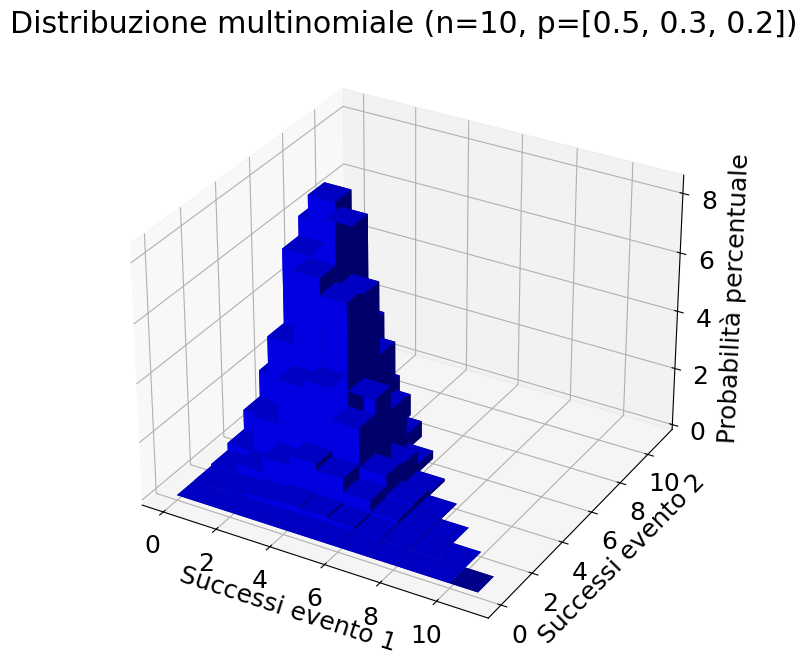

In [24]:
# Grafico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crea una griglia di indici
x, y = np.meshgrid(range(n+1), range(n+1))

# Usa solo valori validi per k1 + k2 <= n
valid = (x + y <= n)
x = x[valid]
y = y[valid]
z = bd[valid]*100
z_teorica = bd_teorica[valid]*100


# Crea il grafico a barre 3D
ax.bar3d(x, y, np.zeros_like(z), 1, 1, z, shade=True, color='blue')
# Plot delle barre teoriche semi-trasparenti
#ax.bar3d(x, y, z, 1, 1, z_teorica - z, color='red', alpha=0.3, label='Teorica')
#ax.scatter(x, y, z_teorica, color='red', label='Teorica', s=50)


ax.set_xlabel('Successi evento 1')
ax.set_ylabel('Successi evento 2')
ax.set_zlabel('Probabilità percentuale')

plt.title('Distribuzione multinomiale (n=10, p=[0.5, 0.3, 0.2])')
plt.show()

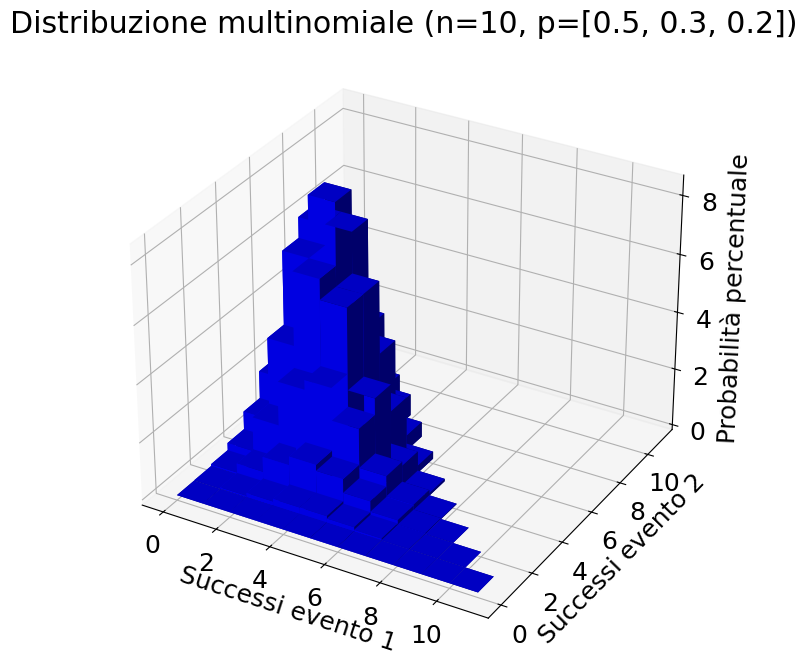

In [25]:
# Grafico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, np.zeros_like(z_teorica), 1, 1, z_teorica, shade=True, color='blue')

ax.set_xlabel('Successi evento 1')
ax.set_ylabel('Successi evento 2')
ax.set_zlabel('Probabilità percentuale')

plt.title('Distribuzione multinomiale (n=10, p=[0.5, 0.3, 0.2])')
plt.show()

#### Heatmap

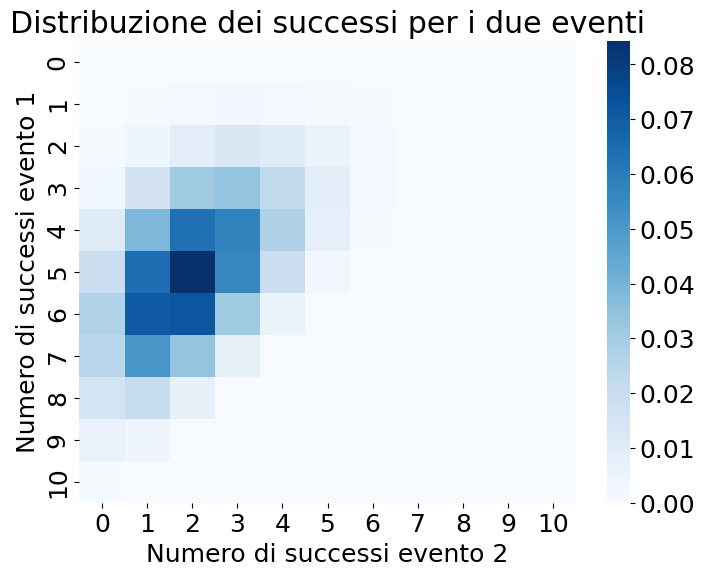

In [21]:
#plot dell'esperimento tramite heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(bd, annot=False, cmap="Blues", cbar=True)
plt.title('Distribuzione dei successi per i due eventi')
plt.xlabel('Numero di successi evento 2')
plt.ylabel('Numero di successi evento 1')
plt.show()

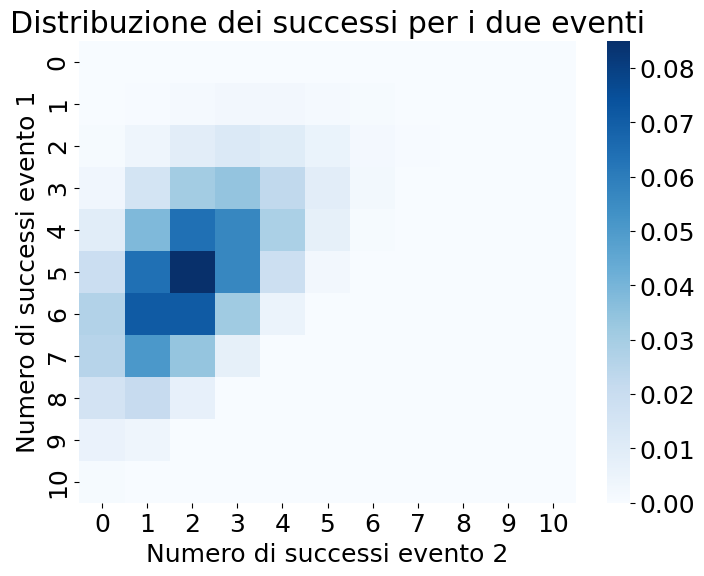

In [22]:
#plot dell'esperimento tramite heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(bd_teorica, annot=False, cmap="Blues", cbar=True)
plt.title('Distribuzione dei successi per i due eventi')
plt.xlabel('Numero di successi evento 2')
plt.ylabel('Numero di successi evento 1')
plt.show()

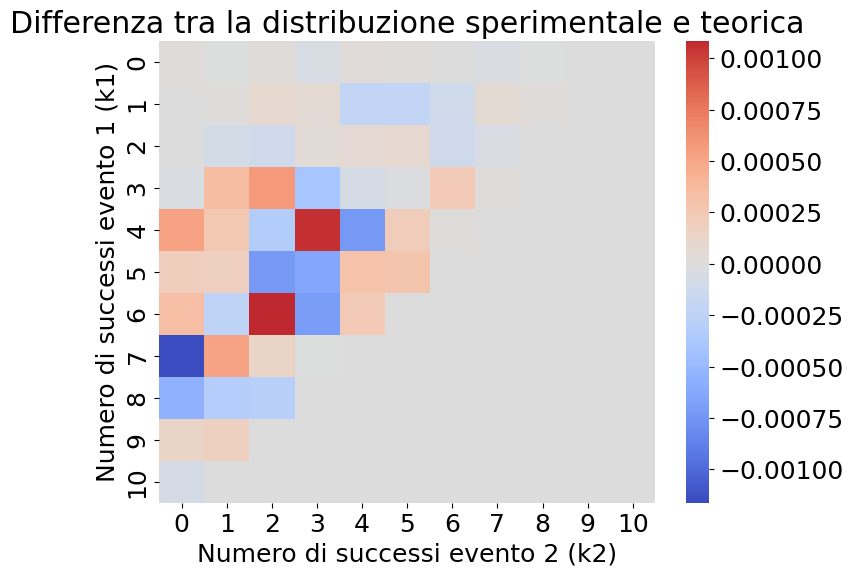

In [23]:
# Calcolo della differenza tra sperimentale e teorica
diff = bd - bd_teorica

# Plot delle differenze con una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diff, annot=False, cmap="coolwarm", center=0, cbar=True)
plt.title('Differenza tra la distribuzione sperimentale e teorica')
plt.xlabel('Numero di successi evento 2 (k2)')
plt.ylabel('Numero di successi evento 1 (k1)')
plt.show()